In [1]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import vectorize
import util
import pandas as pd
def get_parser_data(filename):
    """Method for reading columns of .csv file"""
    file = pd.read_csv(filename, sep = ",",error_bad_lines=False)
    return file
def bow_knn():

    training_data = get_parser_data("uci-news-aggregator.csv")
    X_train, X_test, y_train, y_test = train_test_split(training_data["TITLE"], training_data["CATEGORY"], test_size=0.2, random_state=5)
    X_train, X_test = vectorize.createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='jaccard', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(scores)
    print('\n')

def tfidf_knn():
    """Method for determining nearest neighbors using bag-of-words model and K-Nearest Neighbor algorithm"""

    training_data = get_parser_data("uci-news-aggregator1.csv")
    X_train, X_test, y_train, y_test = train_test_split(training_data["TITLE"], training_data["CATEGORY"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = vectorize.createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(scores)
    return predicted,y_test

In [18]:
predictions,y_test=tfidf_knn()

KNN with TFIDF accuracy = 98.5%
Cross Validation Accuracy: 1.00 (+/- 0.01)
[0.99250936 0.99625468 1.        ]


In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.985
Recall score:  0.985
Precision score:  0.9852393617021277
F1 score:  0.9842269883824843


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 't', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 't', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

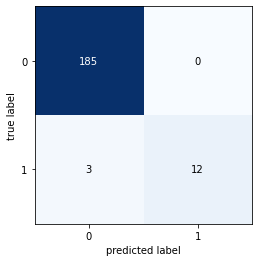

In [21]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

#listofclasses


expected =y_test.tolist()
predicted =predictions.tolist() 
print(expected)
print(predicted)
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()